# Códigos da Lista de Eletro

## Questão 2

A questão nos informa a corrente é ligada no instante $t = 0$ em todo o fio,
\begin{equation}
  \mathbf{I} (t) = I(t) \mathbf{\hat{z}} = I_0 (1 - e^{-t/\tau}) \mathbf{\hat{z}}.
\end{equation}
Porém, sabemos que a informação dos campos e potenciais gerados por um ponto do fio na posição $\mathbf{r'} = (0, \varphi = 0, z')$, em coordenadas cilíndricas, leva um tempo para chegar no ponto $\mathbf{r} = (s, \varphi = 0, z = 0)$, onde sempre podemos tomar $z = 0$ visto que o fio é infinito e $\varphi = 0$ por conta da simetria do sistema, de forma que os potenciais e tudo o mais se encontram no tempo retardado
\begin{equation}
t_r = t - \frac{\left|\mathbf{r} - \mathbf{r'}\right|}{c} = t - \frac{\sqrt{s^2 + z'^2}}{c},
\end{equation}
sendo $s$ o raio e $c$ a velocidade da luz. Como o campo é inicialmente neutro e o $\tau$ é pequeno (i,e, o campo varia pouco), sabemos que
\begin{equation}
  V = 0.
\end{equation}
Sendo assim, queremos montar gráficos do potencial vetor, dado por
\begin{align}
  \mathbf{A} (\mathbf{r}, t) & = \frac{\mu_0}{4 \pi} \int \frac{\mathbf{J} (\mathbf{r'}, t_r)}{\left|\mathbf{r} - \mathbf{r'}\right|} d^3 \mathbf{r'} = \frac{\mu_0}{4 \pi} \mathbf{\hat{z}} \int_{-\infty} ^{\infty} \frac{I(t_r)}{\sqrt{s^2 + z'^2}} dz' \\
  & = \frac{\mu_0 I_0}{2 \pi} \mathbf{\hat{z}} \int_{0} ^{\sqrt{(c t)^2 - s^2}} \frac{(1 - e^{-t_r/\tau})}{\sqrt{s^2 + z'^2}} dz', \\
  & = \frac{\mu_0 I_0}{2 \pi} \mathbf{\hat{z}} \left\{\ln{\left(\frac{ct + \sqrt{(ct)^2 - s^2}}{s} \right)} - \left[\int_{0} ^{\sqrt{(c t)^2 - s^2}} \frac{1}{\sqrt{s^2 + z'^2}}\exp{\left(\frac{\sqrt{s^2 + z'^2}}{c \tau}\right)} dz' \right] e^{-t/\tau}\right\}, \\
  & = \frac{\mu_0 I_0}{2 \pi} \left[\ln{\left(\frac{ct + \sqrt{(ct)^2 - s^2}}{s} \right)} - I(s,t) e^{-t/\tau}\right] \mathbf{\hat{z}}
\end{align}
visto que apenas o sinal vindo de $|z'|\leq \sqrt{(c t)^2 - s^2}$ chega ao ponto $\mathbf{r}$ no tempo $t$, bem como dos campos
\begin{align}
\mathbf{E} & = - \frac{\partial \mathbf{A}}{\partial t}, \\
\mathbf{B} & = \nabla \times \mathbf{A}.
\end{align}
para $t$ fixo ($s$ variando) e $s$ fixo ($t$ variando). Os campos serão
\begin{equation}
  \mathbf{E} (s, t) = E \mathbf{\hat{z}} = \frac{\mu_0 I_0 c}{2 \pi} \left[\left(\frac{\partial I}{\partial t} - \frac{I}{\tau}\right) e^{-t/\tau} - \frac{1}{\sqrt{(ct)^2 - s^2}}\right] \mathbf{\hat{z}},
\end{equation}
e
\begin{equation}
  \mathbf{B} (s, t) = - \frac{\partial A_z}{\partial s} \mathbf{\hat{\varphi}} = \frac{\mu_0 I_0}{2 \pi} \left[\frac{c t}{s\sqrt{(ct)^2 - s^2}} + \frac{\partial I(s,t)}{\partial s} e^{-t/\tau} \right] \mathbf{\hat{\varphi}} = B \mathbf{\hat{\varphi}},
\end{equation}
que condizem com o resultado do Griffiths para uma corrente que instantaneamente passa a ser $\mathbf{I} = I_0 \mathbf{\hat{z}}$, no limite em que $t \to \infty$. Com essas informações em mãos, vamos começar o código importanto os módulos e definindo as constantes.

In [ ]:
import math as m
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

c = 2.98e8 # m/s
mu0 = 1.257e-6 # N.A
tau = 1.0 # s
I0 = 1.0 # A

Agora vamos definir funções para a integral, o potencial e os campos, lembrando que se $\sqrt{(ct)^2 - s^2} < 0$, a corrente sentida é zero.

In [ ]:
def integrand(z,t):
  ct = c*t
  ctau = c*tau
  integ = np.exp(np.sqrt(ct*ct + z*z)/ctau)/(np.sqrt(ct*ct + z*z))
  return integ

def campoA(s,t):
  ct = c*t
  ctau = c*tau
  if s > ct:
    A = 0.0
  else:
    A0 = mu0*I0/(2*np.pi)
    lim = np.sqrt(ct*ct - s*s)
    I = sp.integrate.quad(integrand,0.0,lim,args=(t))[0]
    arglog = ct/s + np.sqrt(ct*ct - s*s)/s
    A = A0*(np.log(arglog) - I*np.exp(-t/tau))
  return A

def campoE(s,t):
  ct = c*t
  ctau = c*tau
  if s > ct:
    E = 0.0
  else:
    dt = 0.001
    E = (-1.0)*((campoA(s,t+dt)-campoA(s,t-dt))/(2*dt))
  return E

def campoB(s,t):
  ct = c*t
  ctau = c*tau
  if s > ct:
    B = 0.0
  else:
    ds = 0.001
    B = (-1.0)*((campoA(s+ds,t)-campoA(s-ds,t))/(2*ds))
  return B

Agora podemos preparar o código primeiro para $t$ fixo.



In [ ]:
t = [1e-8, 1e-3, 1e-2, 1.0] # t fixo em 10 ns, 1 ms, 10 ms, tau = 1s
s = np.linspace(0.001, 5, 1000) # s vai de 1 mm a 5 m

vecA = []
vecE = []
vecB = []

for j in t:
  linhaA = []
  linhaE = []
  linhaB = []
  for x in s:
    linhaA.append(campoA(x,j))
    linhaE.append(campoE(x,j))
    linhaB.append(campoB(x,j))
  vecA.append(linhaA)
  vecE.append(linhaE)
  vecB.append(linhaB)

vec = [vecA, vecE, vecB]

<ipython-input-211-811d5311b0ea>:16: RuntimeWarning: divide by zero encountered in scalar divide
  arglog = ct/s + np.sqrt(ct*ct - s*s)/s


Agora podemos gerar a primeira leva de gráficos.

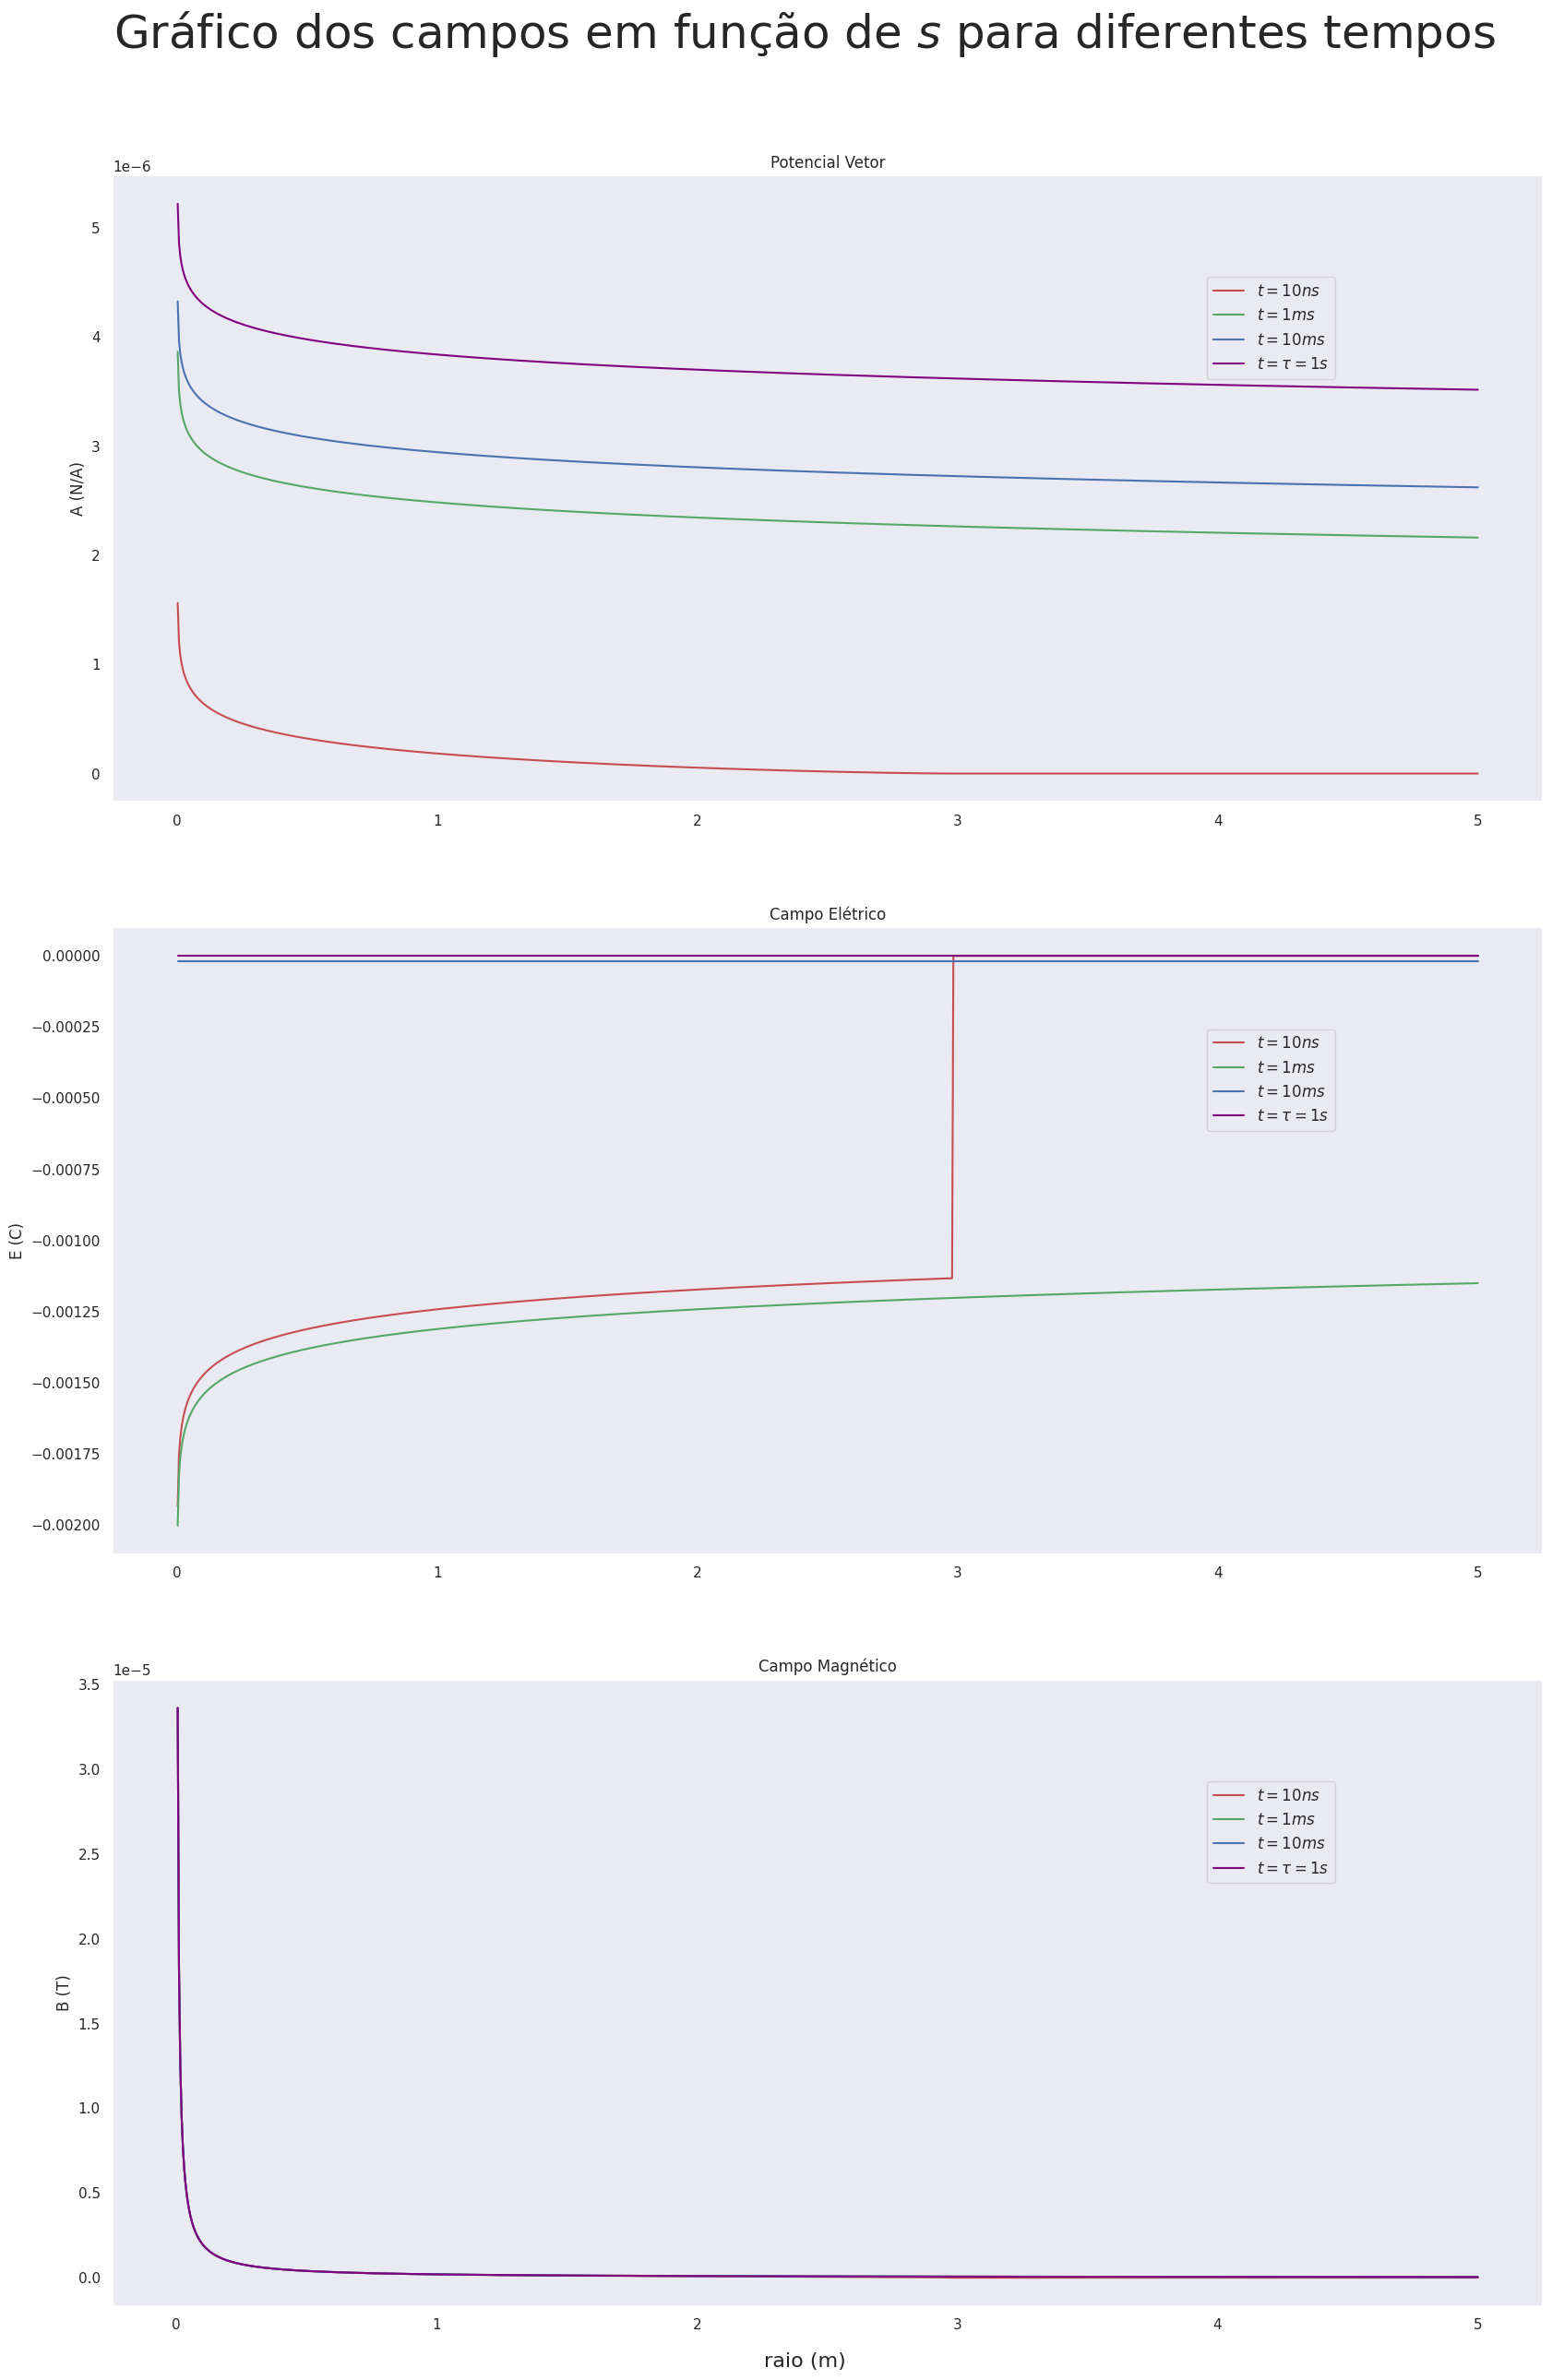

In [ ]:
cores = ['r','g','b','purple']
titles = [r'A (N/A)', r'E (C)', r'B (T)']
titles2 = [r'Potencial Vetor', r'Campo Elétrico', r'Campo Magnético']
labels = [r'$t = 10 n s$', r'$t = 1 ms$', r'$t = 10 ms$', r'$t = \tau = 1 s$']

fig1, axs = plt.subplots(nrows=3, ncols=1) # figsize=(15,25)
fig1.set_figwidth(20)
fig1.set_figheight(30)
fig1.suptitle(r'Gráfico dos campos em função de $s$ para diferentes tempos', y=0.94, fontsize=36)

for j in range(len(vec)):
  ax = axs[j]
  for k in range(len(t)):
    ax.plot(s, vec[j][k], color=cores[k], label=labels[k])
  ax.set(title=titles2[j])
  ax.set_ylabel(titles[j])
  ax.legend(loc='upper left', bbox_to_anchor=(0.76, 0.85), fontsize=12)
  ax.grid()

fig1.text(0.5, 0.09, 'raio (m)', ha='center', va='center',fontsize=16)
handles, labels = ax.get_legend_handles_labels()

Observe que a reta vertical vermelha é uma descontinuidade que indica um ponto de corte abrupto do campo, visto que à partir daí, s > ct. O próximo passo é fazer o código para s fixo e t variando.

In [ ]:
s = [0.01, 0.1, 1.0, 10] # s fixo em 1 cm, 10 cm, 1 m e 10 m
t = np.linspace(0.0001, 1.0, 1000) # t vai de 0.0001 a 1 (vai ser multiplicado por 1e-3 pra contar em ms em breve)

vecA = []
vecE = []
vecB = []

for x in s:
  linhaA = []
  linhaE = []
  linhaB = []
  for j in t:
    linhaA.append(campoA(x,j*1e-3))
    linhaE.append(campoE(x,j*1e-3))
    linhaB.append(campoB(x,j*1e-3))
  vecA.append(linhaA)
  vecE.append(linhaE)
  vecB.append(linhaB)

vec = [vecA, vecE, vecB]

E agora plotamos novamente os gráficos

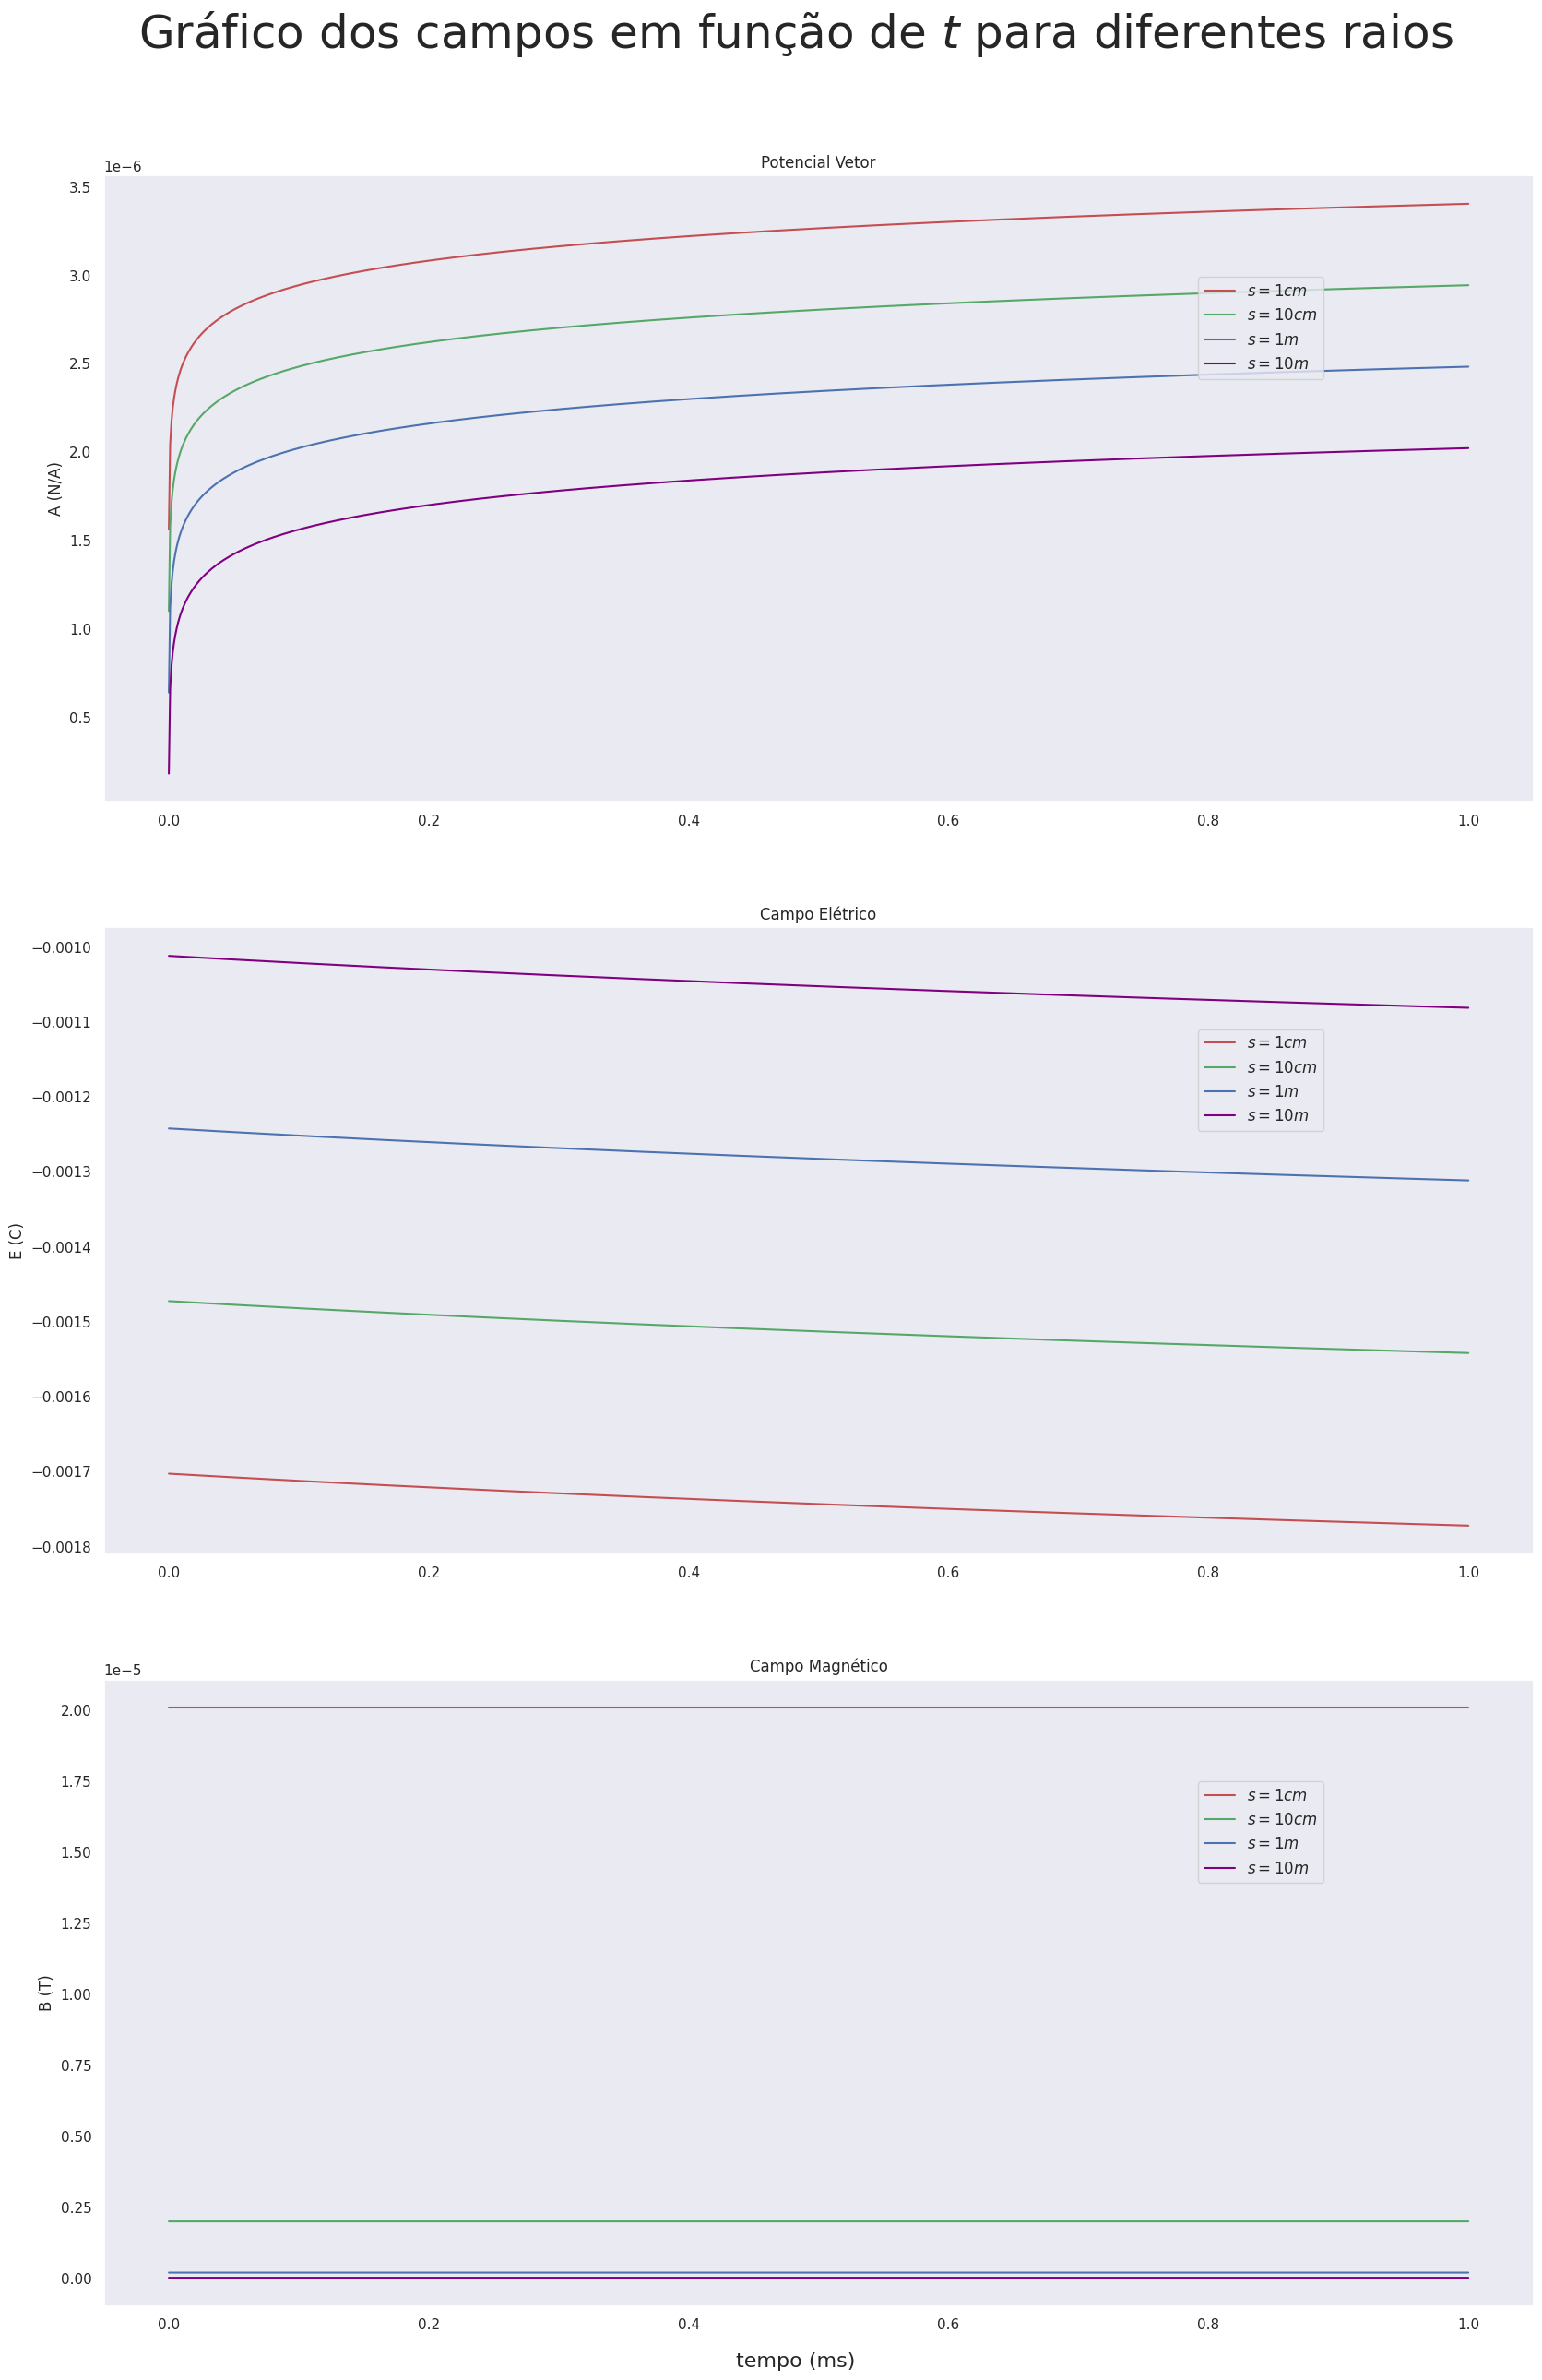

In [ ]:
cores = ['r','g','b','purple']
titles = [r'A (N/A)', r'E (C)', r'B (T)']
titles2 = [r'Potencial Vetor', r'Campo Elétrico', r'Campo Magnético']
labels = [r'$s = 1 cm$', r'$s = 10 cm$', r'$s = 1 m$', r'$s = 10 m$']

fig1, axs = plt.subplots(nrows=3, ncols=1) # figsize=(15,25)
fig1.set_figwidth(20)
fig1.set_figheight(30)
fig1.suptitle(r'Gráfico dos campos em função de $t$ para diferentes raios', y=0.94, fontsize=36)

for j in range(len(vec)):
  ax = axs[j]
  for k in range(len(s)):
    ax.plot(t, vec[j][k], color=cores[k], label=labels[k])
  ax.set(title=titles2[j])
  ax.set_ylabel(titles[j])
  ax.legend(loc='upper left', bbox_to_anchor=(0.76, 0.85), fontsize=12)
  ax.grid()

fig1.text(0.5, 0.09, 'tempo (ms)', ha='center', va='center',fontsize=16)
handles, labels = ax.get_legend_handles_labels()

## Questão 3

Bom, essa é mais tranquila, só precisamos plotar alguns campos vetoriais no plabno x-y para diferentes velocidades da partícula. Dado que o MRU é consequência de partícula livre (que possui simetria por translação espacial e temporal), podemos tomar a posição da partícula na origem, no instante $t = 0$, sem perda de generalidade, o que nos permite escrever a posição de um ponto qualquer no plano como
\begin{equation}
  \mathbf{R} = \mathbf{r} = x \mathbf{\hat{i}} + y \mathbf{\hat{j}},
\end{equation}
o que, junto com $\mathbf{v} = v \mathbf{\hat{i}}$ implica em
\begin{equation}
  \theta = \arctan{\left(\frac{y}{x}\right)},
\end{equation}
ou ainda
\begin{equation}
  \sin{\theta} = \frac{y}{\sqrt{x^2 + y^2}}.
\end{equation}
Isso quer dizer que podemos escrever o campo elétrico como
\begin{equation}
  \mathbf{E} (x, y, t = 0) = \frac{q (1 - \beta^2)}{4 \pi \epsilon_0 \left[x^2 + y^2 \left(1 - \beta^2 \right)\right]^{3/2}} \left(x \mathbf{\hat{i}} + y \mathbf{\hat{j}} \right),
\end{equation}
onde $\beta = v/c$. Agora podemos começar o código.

In [ ]:
e0 = 1.0/(mu0*c*c) # Permissividade do vácuo
q = 1.0 # Carga

def campoEv(x,y,v):
  beta = v/c
  E0 = (1.0-beta)*q/(4*np.pi*e0*(x*x + y*y*(1.0 - beta*beta))**(3/2))
  Ex = E0*x
  Ey = E0*y
  E = [Ex, Ey]
  return E

E agora podemos montar o campo vetorial para uma dada quantidade de pontos no plano e algumas velocidades da partícula.

<ipython-input-265-3e60ad361ed5>:6: RuntimeWarning: divide by zero encountered in divide
  E0 = (1.0-beta)*q/(4*np.pi*e0*(x*x + y*y*(1.0 - beta*beta))**(3/2))
<ipython-input-265-3e60ad361ed5>:7: RuntimeWarning: invalid value encountered in multiply
  Ex = E0*x
<ipython-input-265-3e60ad361ed5>:8: RuntimeWarning: invalid value encountered in multiply
  Ey = E0*y


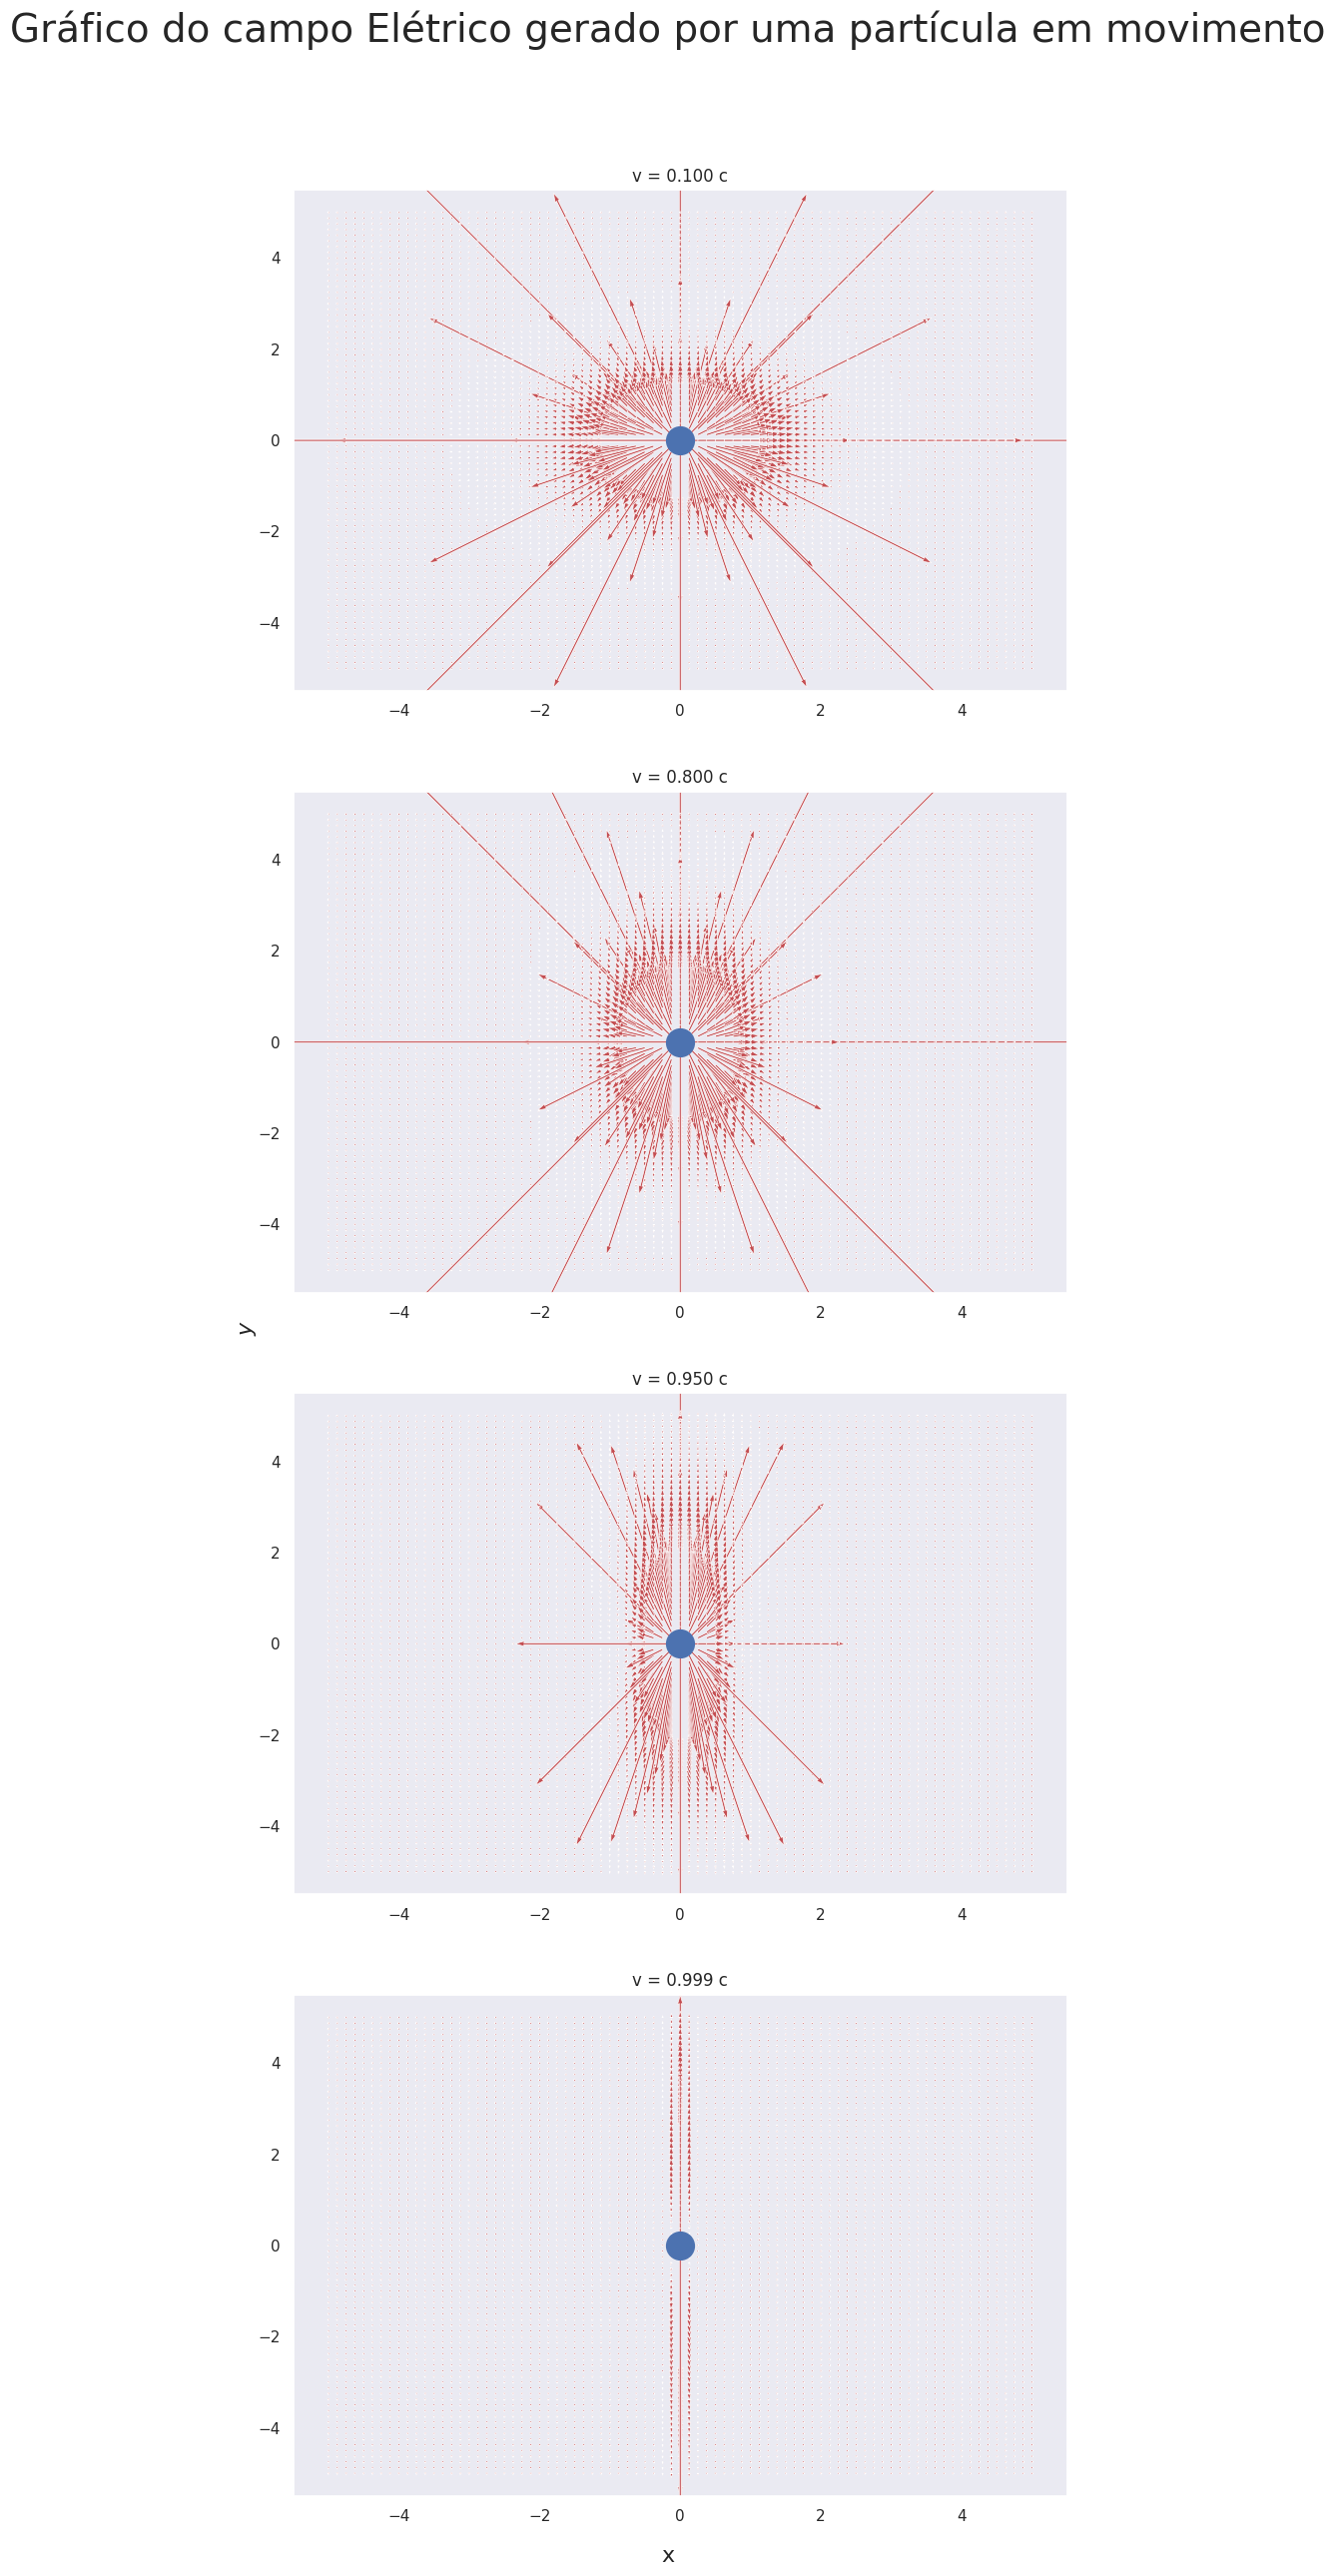

In [ ]:
v = [0.1*c,0.8*c,0.95*c,0.999*c] # velocidades da partícula
mapa = list(map(float,np.linspace(-5,5,81)))
mapa2 = list(map(float,np.linspace(-5,5,81)))
r = -0.125
while r<0.25:
  mapa.remove(r)
  r += 0.125

x,y = np.meshgrid(mapa2, mapa2)

Ev = []
for j in v:
  Ev.append(campoEv(x,y,j))

fig1, axs = plt.subplots(nrows=4, ncols=1) # figsize=(15,25)
fig1.set_figwidth(10)
fig1.set_figheight(30)
fig1.suptitle(r'Gráfico do campo Elétrico gerado por uma partícula em movimento', y=0.94, fontsize=28)

for j in range(len(v)):
  ax = axs[j]
  ax.quiver(x,y, Ev[j][0], Ev[j][1], color='r', linewidth=0.5)
#  ax.streamplot(x,y, Ev[j][0], Ev[j][1], density=5.0, linewidth=None, color='r')
  ax.plot(0,0,'-ob', linewidth=10, markersize=20)
  ax.set(title=r'v = %.3f c'%(v[j]/c))
#  ax.legend(loc='upper left', bbox_to_anchor=(0.76, 0.85), fontsize=12)
  ax.grid()

fig1.text(0.5, 0.09, 'x', ha='center', va='center',fontsize=16)
fig1.text(0.08, 0.5, '$y$', ha='center', va='center', rotation='vertical',fontsize=16)
handles, labels = ax.get_legend_handles_labels()

Podemos tambem tentar uma animação

In [ ]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
from matplotlib.patches import Circle

Time step 0...


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


Time step 1...
Time step 2...
Time step 3...
Time step 4...
Time step 5...
Time step 6...
Time step 7...
Time step 8...
Time step 9...
Time step 10...
Time step 11...
Time step 12...
Time step 13...
Time step 14...
Time step 15...
Time step 16...
Time step 17...
Time step 18...
Time step 19...


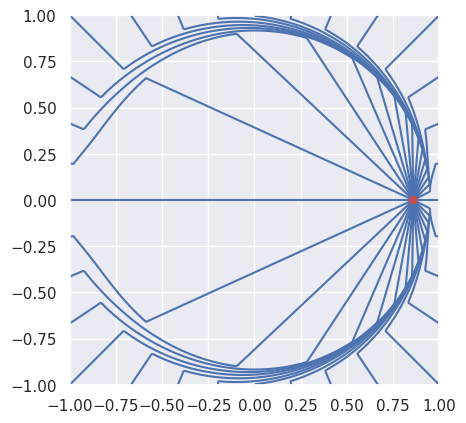

In [ ]:

v = 0.9  # relative to c

# initial acceleration during t=0..taccel and x=0..xaccel
a = 10
taccel = v/a
xaccel = a*taccel*taccel/2

# plot ranges
xymax = 1
tmax = 1
ntstep = 20
ts = np.linspace(0, tmax, ntstep)

def sourcepos(t):
  return xaccel+v*(t-taccel) if t >= taccel else a*t*t/2

# determine source of current observation assuming source at x=v*t
def wavesource_constv(x, y, t):
  # quadratic, discriminant always >=0 for v<=1
  discriminant = (v*t-x)**2 + (1-v*v)*y*y
  tr = (-(v*x-t) - np.sqrt(discriminant)) / (1-v*v)
  return tr

# determine source of current observation assuming source at x=a*t*t/2
def wavesource_accel(x, y, t):
  # this code solves a depressed quartic
  A = -4*(1+a*x)/(a*a)
  B = 8*t/(a*a)
  C = 4*(x*x+y*y-t*t)/(a*a)
  p = -A*A/12 - C
  q = -A*A*A/108 + A*C/3 - B*B/8
  w = (-q/2+np.sqrt(q*q/4+p*p*p/27+0J))**(1./3)
  Y = A/6 + w - p/(3*w)
  Z1 = np.sqrt(2*Y-A)/2
  Z2 = np.sqrt(-2*Y-A+2*B/np.sqrt(2*Y-A))/2
  tr = abs(Z1-Z2)  # smallest positive solution
  assert abs(np.imag(tr)) < 1e-6
  tr = np.real(tr)
  return tr

def wavesource(x, y, t):
  if x*x+y*y >= t*t:
    # observer has not seen charge start moving yet
    X = 0
    V = 0
    A = 0
    tr = 0
  else:
    # first solve assuming constv region, if time negative then still in accelerating region
    tr = wavesource_constv(x-xaccel, y, t-taccel)
    if tr >= 0:
      X = v*tr + xaccel
      V = v
      A = 0
      tr = tr + taccel
    else:
      tr = wavesource_accel(x, y, t)
      assert tr >= 0
      X = a*tr*tr/2
      V = a*tr
      A = a
  return (np.array((X,0,0)), np.array((V,0,0)), np.array((A,0,0)), tr)


def Efield(x, y, t):
  robs = np.array((x, y, 0))
  X, V, A, tr = wavesource(x, y, t)
  rvec = robs - X
  r = linalg.norm(rvec)
  assert(tr == 0 or abs(t - tr - r) < 1e-6)  # sanity check tr calculation
  if r == 0:
    r = 1e-12
  n = rvec/r
  gamma = 1/np.sqrt(1-np.dot(V,V))
  E = (n-V)/(gamma*gamma*r*r) + np.cross(n, np.cross(n-V, A))/r
  E /= (1-np.dot(V, n))**3
  return E[:2]

# trick: we know the field is symmetric at infinity, so we draw outside in
def fieldstartpoints(t):
  nlines = 32
  angles = np.linspace(0, 2*np.pi, nlines, endpoint=False)
  startpoints = []
  for angle in angles:
    # field must be symmetric beyond tmax, but draw at least to axis
    a = angle % (np.pi/2)
    a = np.pi/2-a if (a > np.pi/4) else a
    dist2axis = 1/np.cos(a)
    r = max(tmax, dist2axis)
    startpoints.append((r*np.cos(angle), r*np.sin(angle)))
  return startpoints

# second-order Runge-Kutta, specifically Ralston's method
def rk2(f, x):
  h = 0.01
  k1 = f(x)
  k1 = h * (k1 / linalg.norm(k1))
  est = x + k1*3/4
  k2 = f(est)
  k2 = h * (k2 / linalg.norm(k2))
  return x + k1/3 + k2*2/3

class FieldPlot:
  def __init__(self, lc, c):
    self.lc = lc
    self.c = c

  def remove(self):
    self.lc.remove()
    self.c.remove()

def fieldplot(ax, sourcex, startpoints, f):
  fieldlines = []
  for x, y in startpoints:
    segs = []
    for i in range(1000):
      segs.append((x,y))
      x, y = rk2(f, (x, y))
      rsq = (x-sourcex)**2 + y**2
      if abs(rsq) < 1e-4:
        break
    fieldlines.append(segs)

  lc = ax.add_collection(LineCollection(fieldlines))
  c = ax.add_patch(Circle((sourcex,0), 0.02, color='r', zorder=1000))
  return FieldPlot(lc, c)

def animate(ti):
  print("Time step %d..." % ti)
  t = ts[ti]

  global fieldplotobj
  if 'fieldplotobj' in globals():
    fieldplotobj.remove()

  sourcex = sourcepos(t)
  startpoints = fieldstartpoints(ts[ti])
  fieldplotobj = fieldplot(ax, sourcex, startpoints, lambda x: -Efield(x[0], x[1], ts[ti]))

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-xymax, xymax)
ax.set_ylim(-xymax, xymax)
anim = animation.FuncAnimation(fig, animate, frames=ntstep, blit=False, repeat=False, init_func=lambda: None)
anim.save('./efield-accel.mp4', writer='ffmpeg', fps=5)
plt.show()